In [14]:
%reload_ext autoreload
%autoreload 2

[[0.    ]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.2776]
 [0.4228]
 [0.5179]
 [0.6041]
 [0.6699]
 [0.7208]
 [0.7691]
 [0.7978]
 [0.8282]
 [0.8544]
 [0.8772]
 [0.9022]
 [0.912 ]
 [0.924 ]
 [0.9388]
 [0.9457]]


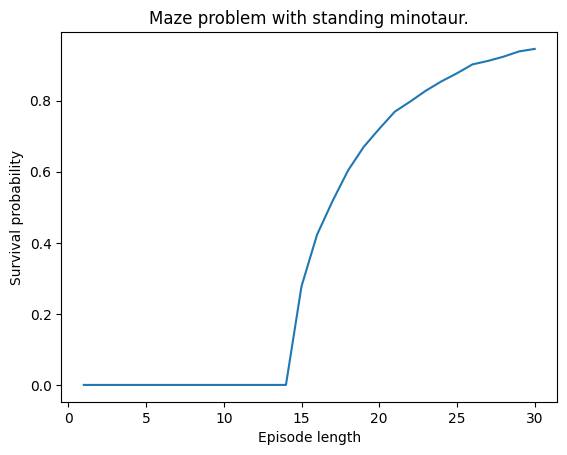

In [32]:
import numpy as np
import maze as mz 
import matplotlib.pyplot as plt

def illustrate(env, policy):
    pass



# def demo_policy(env, policy):
#     """!@brief Visualizes the moves of a given policy.
    
#     Minotaur always fixed at (4,4). Moves are shown as arrows. 
#     """
#     LIGHT_GREEN  = '#95FD99'
#     BLACK        = '#000000'
#     WHITE        = '#FFFFFF'
#     LIGHT_PURPLE = '#E8D0FF'

#     col_map = {0: WHITE, 1: BLACK, 2: LIGHT_GREEN}

#     # Size of the maze
#     rows,cols = env.maze.shape

#     # Create figure of the size of the maze
#     fig = plt.figure(1, figsize=(cols,rows))

#     # Remove the axis ticks and add title title
#     ax = plt.gca()
#     ax.set_title('Policy simulation at time step 0')
#     ax.set_xticks([])
#     ax.set_yticks([])

#     # Give a color to each cell
#     colored_maze = [[col_map[env.maze[j,i]] for i in range(cols)] for j in range(rows)]
    
#     # Create figure of the size of the maze
#     fig = plt.figure(1, figsize=(cols,rows))
    
#     # Create a table to color
#     grid = plt.table(cellText=None, cellColours=colored_maze, cellLoc='center',loc=(0,0),edges='closed')

#     # Modify the hight and width of the cells in the table
#     tc = grid.properties()['children']
#     for cell in tc:
#         cell.set_height(1.0/rows)
#         cell.set_width(1.0/cols)

#     minotaur_pos = (4,4)
#     grid.get_celld()[(minotaur_pos)].set_facecolor(LIGHT_PURPLE)
#     grid.get_celld()[(minotaur_pos)].get_text().set_text('Minotaur')
#     for x in range(7):
#         for y in range(8):
#             if env.maze[x,y] != 1 and (x,y) != (6,5) and (x,y) != minotaur_pos:
#                 a = policy[env.map[(x,y,*minotaur_pos)],0]
#                 # New markings
#                 if a == 0: 
#                     arrow = 'wait'
#                 elif a == 1:
#                     arrow = '\u2190'
#                 elif a == 2:
#                     arrow = '\u2192'
#                 elif a == 3:
#                     arrow = '\u2191'
#                 else:
#                     arrow = '\u2193'
#                 grid.get_celld()[(x,y)].get_text().set_text(arrow)
#     plt.show()
    


if __name__ == '__main__':
    maze = np.array([
        [0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 1, 1, 1],
        [0, 0, 1, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 0, 0, 1, 2, 0, 0]
    ])

    # Create an environment maze
    env = mz.Maze(maze, minotaur_stay=True)
    # env2 = mz.Maze(maze, minotaur_stay=True)
    # env.show()

    # Finite horizon
    horizon = 20

    # Simulate the shortest path starting from position A
    method = 'DynProg';
    start  = (0,0,6,5);


    V, policy= mz.dynamic_programming(env,horizon);
    # V2, policy2= mz.dynamic_programming(env2,horizon);


    p = np.zeros((30,1))
    path = env.simulate(start, policy, method)
    # # path2 = env.simulate(start, policy2, method)
    # print(path)
    # # print(path2)
    # # mz.animate_solution(maze,path)
    for i in range(1,31):
        success_cnt = 0
         # Solve the MDP problem with dynamic programming
        V, policy= mz.dynamic_programming(env,i);
        for _ in range(10000):
            path = env.simulate(start, policy, method);
            if path[-1][0:2] == (6,5):
                success_cnt += 1
        p[i-1] = success_cnt/1e4

    print(p)
    plt.plot(range(1,31), p)
    plt.title('Maze problem with standing minotaur.')
    plt.ylabel('Survival probability')
    plt.xlabel('Episode length')
    plt.show()


In [28]:
print(path)

[(0, 0, 6, 5), (0, 1, 6, 6), (1, 1, 5, 6), (2, 1, 5, 7), (3, 1, 5, 6), (4, 1, 6, 6), (4, 2, 6, 5), (4, 3, 6, 4), (4, 4, 6, 5), (4, 5, 6, 4), (4, 6, 5, 4), (4, 7, 5, 3), (5, 7, 5, 2), (6, 7, 5, 1), (6, 6, 5, 2), (6, 5, 5, 3), (6, 5, 5, 3), (6, 5, 5, 3), (6, 5, 5, 3), (6, 5, 5, 3), (6, 5, 5, 3)]
